# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key ="&appid=886705b4c1182eb1c69f28eb8c520e20"
units="&units=imperial"

## Generate Cities List

In [172]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp= []
hum= []
wspeed= []
clouds= []
lats=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
new_lats_lngs = []
# Identify nearest city for each lat, lng combination


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        new_lats_lngs.append(lat_lng)
    citi= pd.DataFrame(cities)
# Print the city count to confirm sufficient count


In [173]:

new_lats = [i[0] for i in new_lats_lngs]
new_lats= pd.Series(new_lats)


In [174]:
print("Beginning Data Retrieval")    
print("-----------------------------")
    
for index, row in citi.iterrows():
    print(f"Processing Record {index} of Set 1 | {row} ")
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | 0    bathsheba
Name: 0, dtype: object 
Processing Record 1 of Set 1 | 0    upernavik
Name: 1, dtype: object 
Processing Record 2 of Set 1 | 0    hilo
Name: 2, dtype: object 
Processing Record 3 of Set 1 | 0    ribeira grande
Name: 3, dtype: object 
Processing Record 4 of Set 1 | 0    vanimo
Name: 4, dtype: object 
Processing Record 5 of Set 1 | 0    providencia
Name: 5, dtype: object 
Processing Record 6 of Set 1 | 0    avarua
Name: 6, dtype: object 
Processing Record 7 of Set 1 | 0    tuktoyaktuk
Name: 7, dtype: object 
Processing Record 8 of Set 1 | 0    seydi
Name: 8, dtype: object 
Processing Record 9 of Set 1 | 0    khatanga
Name: 9, dtype: object 
Processing Record 10 of Set 1 | 0    thessalon
Name: 10, dtype: object 
Processing Record 11 of Set 1 | 0    innisfail
Name: 11, dtype: object 
Processing Record 12 of Set 1 | 0    punta arenas
Name: 12, dtype: object 
Processing Record 13 of Set 1 | 0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [175]:

# tv maze show search base url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# set up lists to hold response data for name and rating


# loop through tv show titles, make requests and parse

for city in cities:
    target_url = base_url + city + api_key + units
    response = requests.get(target_url).json()

    try:
        temp.append(response["main"]["temp"])
        hum.append(response["main"]["humidity"])
        wspeed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
    except:
        temp.append(np.nan)
        hum.append(np.nan)
        wspeed.append(np.nan)
        clouds.append(np.nan)
        
        
    # "Catching" the error lets the rest of our code execute
    #print("...But the program doesn't die early!")
    #temp.append(response["main"]["temp"])
    #hum.append(response["main"]["humidity"])
    #wspeed.append(response["wind"]["speed"])
    #clouds.append(response["clouds"]["all"])

    #hum



In [176]:
print(len(temp), len(hum), len(wspeed), len(clouds), len(new_lats), len(cities))




605 605 605 605 605 605


In [177]:
cities = pd.Series(cities)

In [178]:
temp_df = pd.DataFrame({
    'temperature': temp,
    'humidity': hum,
    'wind speed': wspeed,
    'cloudiness': clouds,
    'lats': new_lats,
    'cities': cities
})
temp_df

,temperature,humidity,wind speed,cloudiness,lats,cities
0,80.60,88.0,26.40,75.0,17.013790,bathsheba
1,39.13,67.0,9.04,78.0,83.488930,upernavik
2,78.49,62.0,5.82,1.0,13.357819,hilo
3,72.61,91.0,11.43,39.0,40.258370,ribeira grande
4,80.71,73.0,7.38,98.0,-2.355227,vanimo
5,53.35,80.0,5.66,19.0,28.913414,providencia
6,71.60,78.0,5.82,66.0,-43.637133,avarua
7,46.40,87.0,9.17,90.0,83.256350,tuktoyaktuk
8,76.93,73.0,7.83,34.0,39.670511,seydi
9,55.87,94.0,5.75,100.0,72.049911,khatanga


In [179]:
temp_df.dropna()

,temperature,humidity,wind speed,cloudiness,lats,cities
0,80.60,88.0,26.40,75.0,17.013790,bathsheba
1,39.13,67.0,9.04,78.0,83.488930,upernavik
2,78.49,62.0,5.82,1.0,13.357819,hilo
3,72.61,91.0,11.43,39.0,40.258370,ribeira grande
4,80.71,73.0,7.38,98.0,-2.355227,vanimo
5,53.35,80.0,5.66,19.0,28.913414,providencia
6,71.60,78.0,5.82,66.0,-43.637133,avarua
7,46.40,87.0,9.17,90.0,83.256350,tuktoyaktuk
8,76.93,73.0,7.83,34.0,39.670511,seydi
9,55.87,94.0,5.75,100.0,72.049911,khatanga


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
temp_df.to_csv('Weather.csv')

In [ ]:
temp_df

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

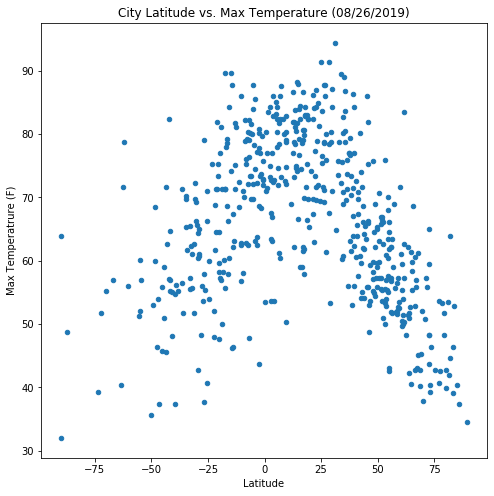

In [183]:
temp_df.plot(kind="scatter", x="lats", y="temperature", grid=False, figsize=(8,8),
              title="City Latitude vs. Max Temperature (08/26/2019)")
plt.xlabel ('Latitude')
plt.ylabel ('Max Temperatrure (F)')
plt.show()
plt.savefig('LatTemp.png')

#### Latitude vs. Humidity Plot

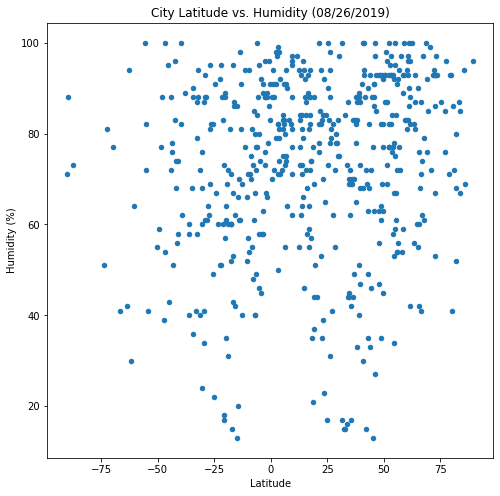

<Figure size 432x288 with 0 Axes>

In [184]:
temp_df.plot(kind="scatter", x="lats", y="humidity", grid=False, figsize=(8,8),
              title="City Latitude vs. Humidity (08/26/2019)")
plt.xlabel ('Latitude')
plt.ylabel ('Humidity (%)')
plt.show()
plt.savefig('LatHum.png')

#### Latitude vs. Cloudiness Plot

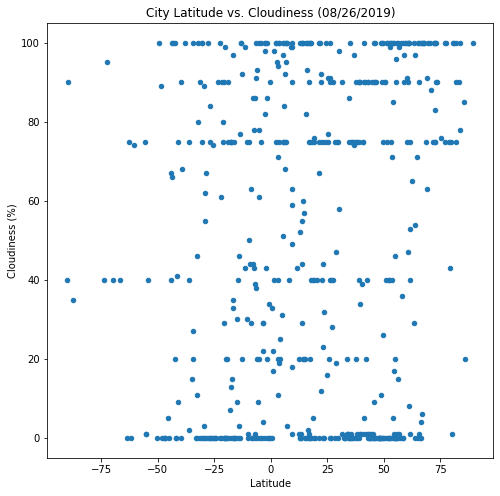

<Figure size 432x288 with 0 Axes>

In [185]:
temp_df.plot(kind="scatter", x="lats", y="cloudiness", grid=False, figsize=(8,8),
              title="City Latitude vs. Cloudiness (08/26/2019)")
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness (%)')
plt.show()
plt.savefig('LatCloud.png')

#### Latitude vs. Wind Speed Plot

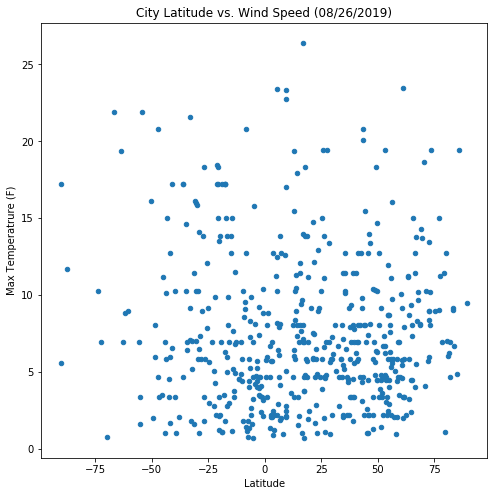

<Figure size 432x288 with 0 Axes>

In [186]:
temp_df.plot(kind="scatter", x="lats", y="wind speed", grid=False, figsize=(8,8),
              title="City Latitude vs. Wind Speed (08/26/2019)")
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed')
plt.show()

plt.savefig('Latwind.png')